${\textbf{Import Required Libraries}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

sns.set()
pd.set_option('max_column', None)
pd.set_option('max_row', None)


In [2]:
train = pd.read_csv('train_Wc8LBpr.csv')
test = pd.read_csv('test_VsU9xXK.csv')
sample = pd.read_csv('sample_submission_NoPBkjr.csv')



${\textbf{Simple EDA (Text)}}$

In [3]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
train.shape, test.shape

((131662, 14), (87395, 13))

In [5]:
train.isnull().sum() * 100 / len(train)

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [7]:
target = 'Surge_Pricing_Type'
trip_ID = test['Trip_ID']
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [8]:
train.describe(include='O')

,Trip_ID,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,111452,111469,131662,131662
unique,131662,5,3,14,2
top,T0005733271,B,B,A,Male
freq,1,31136,40355,77597,93900


In [9]:
train[target] = train[target].astype('int')

In [10]:
train[target].value_counts(normalize=True)*100

2    43.086084
3    36.244323
1    20.669593
Name: Surge_Pricing_Type, dtype: float64

In [11]:

# join test to train
df = train.append(test, ignore_index=True)
df.shape

(219057, 14)

In [ ]:
df.drop('Trip_ID', axis=1, inplace=True)

${\textbf{Chart EDA (Viz)}}$

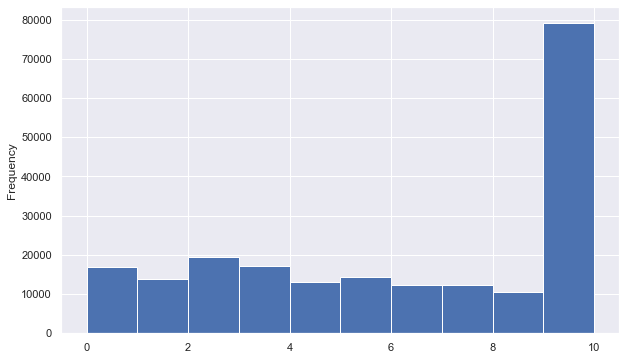

In [13]:
df['Customer_Since_Months'].plot(kind='hist', figsize=(10,6))

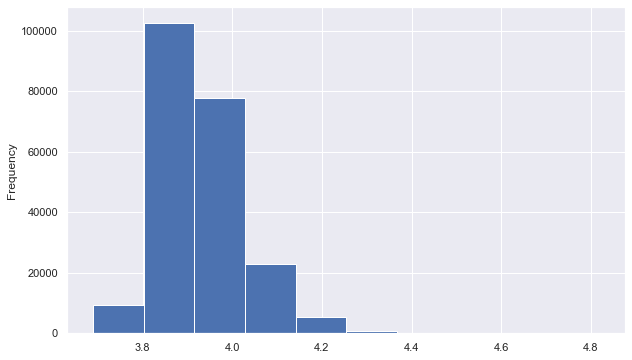

In [14]:
np.log(df['Var2']).plot(kind='hist', figsize=(10,6))

${\textbf{Feature Engineering}}$
<p>Fix Missing Values</p>

In [15]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(-1)
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(-1)
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna(-1)
df['Type_of_Cab'] = df['Type_of_Cab'].fillna(-1)
df['var3_by_Life_Style_Index'] = df['Var3'] / df['Life_Style_Index']
df['var3_by_Custromer_Rating'] = df['Var3'] / df['Customer_Rating']
df['log_Var2'] = np.log(df['Var2'])
df['trip_Distance_by_Customer_Rating'] = df['Trip_Distance'] / df['Customer_Rating']

${\textbf{Label Encoding and Binarizer}}$

In [16]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb = LabelBinarizer()
le = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Customer_Since_Months'] = le.fit_transform(df['Customer_Since_Months'])
df['Cancellation_Last_1Month'] = lb.fit_transform(df['Cancellation_Last_1Month'])

${\textbf{Dummy Variable (OHE)}}$

In [17]:
df_dummy = pd.get_dummies(data=df, columns=['Type_of_Cab', 'Confidence_Life_Style_Index',
                                                'Destination_Type',])

df_dummy.shape

(219057, 38)

In [15]:
df_dummy.isnull().sum()

Trip_Distance                            0
Customer_Since_Months                    0
Life_Style_Index                         0
Customer_Rating                          0
Cancellation_Last_1Month                 0
Var1                                117819
Var2                                     0
Var3                                     0
Gender                                   0
Surge_Pricing_Type                   87395
var3_by_Life_Style_Index                 0
var3_by_Custromer_Rating                 0
log_Var2                                 0
trip_Distance_by_Customer_Rating         0
Type_of_Cab_-1                           0
Type_of_Cab_A                            0
Type_of_Cab_B                            0
Type_of_Cab_C                            0
Type_of_Cab_D                            0
Type_of_Cab_E                            0
Confidence_Life_Style_Index_-1           0
Confidence_Life_Style_Index_A            0
Confidence_Life_Style_Index_B            0
Confidence_

In [18]:
df_dummy.drop('Var1',axis=1, inplace=True)

In [19]:
train_df = df_dummy[df_dummy[target].notnull() == True]
test_df = df_dummy[df_dummy[target].notnull() == False]

train_df.shape, test_df.shape

((131662, 37), (87395, 37))

${\textbf{Feature Selection Based on Importance}}$

In [35]:
cat_features = ['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
               'Var3', 'trip_Distance_by_Customer_Rating', 'Type_of_Cab_-1','Type_of_Cab_A',
               'Type_of_Cab_B','Type_of_Cab_C','Type_of_Cab_D','Type_of_Cab_D','Type_of_Cab_E',
               'Confidence_Life_Style_Index_A', 'Confidence_Life_Style_Index_B', 'Destination_Type_B']

In [20]:
test_df.drop(target, axis=1, inplace=True)

${\textbf{Train and Test Data}}$

In [21]:
X = train_df.drop(target,axis=1)
y = train_df[target]
# test_cat_features = test_df[cat_features]

${\textbf{Normalization}}$

In [22]:
# scale
mm = MinMaxScaler()
X = mm.fit_transform(X)
test_v = mm.transform(test_df)

X

array([[0.05930959, 0.18181818, 0.58342567, ..., 0.        , 0.        ,
        0.        ],
       [0.26771943, 1.        , 0.64380922, ..., 0.        , 0.        ,
        0.        ],
       [0.37890195, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36595667, 1.        , 0.6800979 , ..., 0.        , 0.        ,
        0.        ],
       [0.42756151, 0.45454545, 0.68891306, ..., 0.        , 0.        ,
        0.        ],
       [0.29058024, 0.72727273, 0.67023937, ..., 0.        , 0.        ,
        0.        ]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2020, stratify=y)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

### 5 fold Cross Validation

In [37]:
param = {
    'baggin_freq' : 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class': 4,
    'metric': 'multi_logloss',
    'max_depth': 8,
    'num_leaves': 70,
    'min_data_in_leaf': 40,
    'objective': 'multiclass',
    'scale_pos_weight': 1,
    'verbosity': '1'
#     'device': 'gpu'
}

In [28]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.059310,0.181818,0.583426,0.780945,1.0,0.071429,0.051948,0.0,0.755315,0.000061,0.123530,0.000022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.267719,1.000000,0.643809,0.689922,1.0,0.190476,0.168831,1.0,0.770347,0.000151,0.297394,0.000114,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.378902,1.000000,0.000000,0.700175,0.0,0.190476,0.162338,1.0,0.294488,0.000143,0.297394,0.000160,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.562339,1.000000,0.000000,0.690673,1.0,0.142857,0.142857,1.0,0.308079,0.000136,0.231893,0.000241,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.501653,1.000000,0.686716,0.680420,0.0,0.107143,0.324675,1.0,0.795629,0.000242,0.179371,0.000218,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1022)
predictions = np.zeros((len(test_v), 4))
feature_importance_df = pd.DataFrame()


for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])
    
    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data, val_data], verbose_eval=700, 
                   early_stopping_rounds=300)
    predictions_val = np.argmax(clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration), axis=1)
    
    print('CV Score: {:<8.5f}'.format(accuracy_score(predictions_val, y.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df['Feature'] = train_df.drop(target,axis=1).columns
    fold_importance_df['importance'] = clf.feature_importance()
    fold_importance_df['fold'] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_v, num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
Training until validation scores don't improve for 300 rounds
[700]	training's multi_logloss: 0.706693	valid_1's multi_logloss: 0.723534
[1400]	training's multi_logloss: 0.677204	valid_1's multi_logloss: 0.709799
[2100]	training's multi_logloss: 0.66024	valid_1's multi_logloss: 0.707744
Early stopping, best iteration is:
[2476]	training's multi_logloss: 0.652304	valid_1's multi_logloss: 0.707497
CV Score: 0.69981 
Fold 1
Training until validation scores don't improve for 300 rounds
[700]	training's multi_logloss: 0.708234	valid_1's multi_logloss: 0.717759
[1400]	training's multi_logloss: 0.678721	valid_1's multi_logloss: 0.703842
[2100]	training's multi_logloss: 0.661296	valid_1's multi_logloss: 0.701539
Early stopping, best iteration is:
[2497]	training's multi_logloss: 0.652666	valid_1's multi_logloss: 0.701427
CV Score: 0.70497 
Fold 2
Training until validation scores don't improve for 300 rounds
[700]	training's multi_logloss: 0.70499	valid_1's multi_logloss: 0.728942
[1400]

In [34]:
folds.n_splits

5

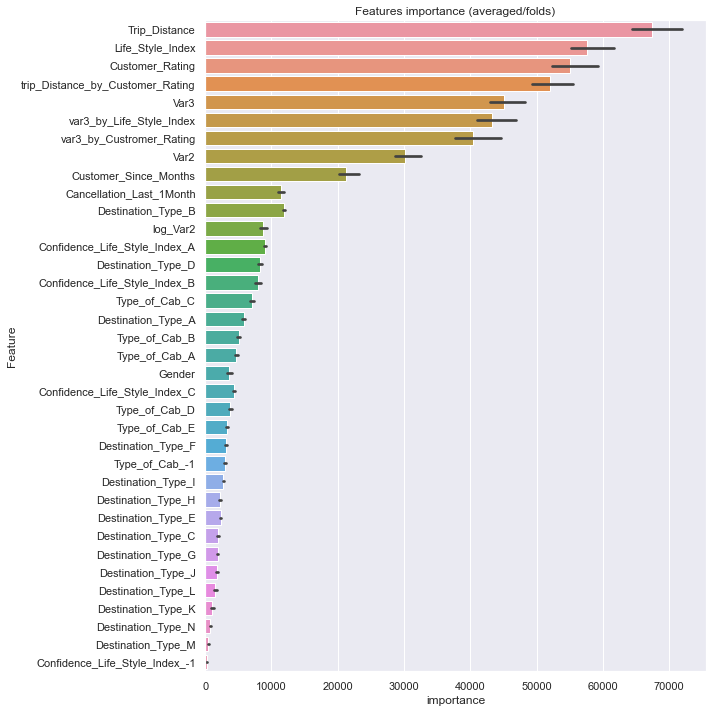

In [40]:
cols = (feature_importance_df[['Feature', 'importance']]\
        .groupby('Feature').mean().sort_values(by='importance', ascending=False)[:150].index)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='Feature', data=best_features.sort_values(by='importance', ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [41]:
predicition_test = np.argmax(predictions, axis=1)

In [42]:
predicition_test[:10]

array([1, 2, 2, 2, 2, 3, 3, 2, 2, 3], dtype=int64)

In [33]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf_preds_train = rf.predict(X_train)
rf_preds_val = rf.predict(X_test)

train_mae_values['rf'] = accuracy_score(y_true=y_train, y_pred=rf_preds_train)
val_mae_values['rf'] = accuracy_score(y_true=y_test, y_pred=rf_preds_val)

In [34]:
grb = GradientBoostingClassifier()

grb.fit(X_train, y_train)
grb_preds_train = grb.predict(X_train)
grb_preds_val = grb.predict(X_test)

train_mae_values['grb'] = accuracy_score(y_true=y_train, y_pred=grb_preds_train)
val_mae_values['grb'] = accuracy_score(y_true=y_test, y_pred=grb_preds_val)

In [35]:
lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)
lgbm_preds_train = lgbm.predict(X_train)
lgbm_preds_val = lgbm.predict(X_test)

train_mae_values['lgbm'] = accuracy_score(y_true=y_train, y_pred=lgbm_preds_train)
val_mae_values['lgbm'] = accuracy_score(y_true=y_test, y_pred=lgbm_preds_val)

In [41]:
rf = RandomForestClassifier( n_estimators=350)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.682299775946531

0.6906543120798997

In [23]:
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
y_pred = grb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6974518664793226

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict
score = cross_val_score(grb, X, y, cv=5, scoring='accuracy').mean()

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.6823377511107735

In [31]:
# testing new models
clf = XGBClassifier(base_score=0.7,booster="gbtree",n_estimators=500, objective='binary:logistic',
                    max_depth=3,learning_rate=0.01,subsample=0.8)
eval_set  = [(X_train,y_train), (X_test,y_test)]
#.900057
clf.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=100, verbose=50)

[0]	validation_0-merror:0.328257	validation_1-merror:0.325827
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[50]	validation_0-merror:0.326434	validation_1-merror:0.324308
[100]	validation_0-merror:0.325941	validation_1-merror:0.323321
[150]	validation_0-merror:0.322219	validation_1-merror:0.320434
[200]	validation_0-merror:0.31844	validation_1-merror:0.316865
[250]	validation_0-merror:0.314272	validation_1-merror:0.312042
[300]	validation_0-merror:0.313257	validation_1-merror:0.311814
[350]	validation_0-merror:0.312307	validation_1-merror:0.31132
[400]	validation_0-merror:0.31095	validation_1-merror:0.310637
[450]	validation_0-merror:0.309867	validation_1-merror:0.309763
[499]	validation_0-merror:0.309411	validation_1-merror:0.308928


XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [42]:

eval_dataset = Pool(X_test, y_test)

cats_model = CatBoostClassifier(learning_rate=0.01,eval_metric='Accuracy',depth=7, iterations=3000)

cats_model.fit(X_train, y_train, eval_set=eval_dataset, verbose=100, early_stopping_rounds=100)

0:	learn: 0.6775342	test: 0.6807048	best: 0.6807048 (0)	total: 174ms	remaining: 8m 41s
100:	learn: 0.6846073	test: 0.6868948	best: 0.6870467 (98)	total: 10.8s	remaining: 5m 10s
200:	learn: 0.6882720	test: 0.6905404	best: 0.6905404 (200)	total: 21.1s	remaining: 4m 53s
300:	learn: 0.6910917	test: 0.6926670	best: 0.6927050 (299)	total: 31.2s	remaining: 4m 39s
400:	learn: 0.6934273	test: 0.6955151	best: 0.6956670 (398)	total: 41.1s	remaining: 4m 26s
500:	learn: 0.6945950	test: 0.6957050	best: 0.6962746 (460)	total: 51s	remaining: 4m 14s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6962746364
bestIteration = 460

Shrink model to first 461 iterations.


In [33]:
y_train_pred = cats_model.predict(X_train)
# how did our model perform on the train set?
count_misclassified = (y_train != y_train_pred).count()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_train_pred, y_train)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 105329
Accuracy: 0.70


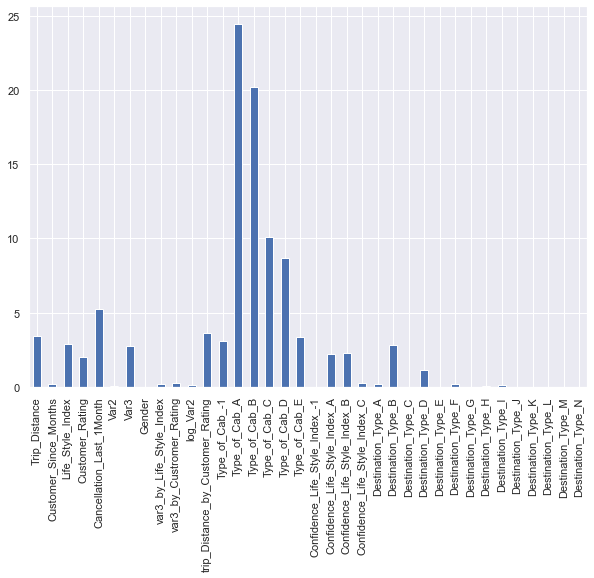

In [34]:
pd.Series(cats_model.feature_importances_, index=train_df.drop(target, axis=1).columns).plot(kind='bar',
                                                                                             figsize=(10,7))

In [43]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type="dart")

lgbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],
         early_stopping_rounds=100, verbose=20)

[20]	valid_0's multi_logloss: 0.759954
[40]	valid_0's multi_logloss: 0.731014
[60]	valid_0's multi_logloss: 0.731171
[80]	valid_0's multi_logloss: 0.726085
[100]	valid_0's multi_logloss: 0.726239


LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

array([1.03943368e-15, 1.39006020e-01, 4.85951307e-01, 3.75042673e-01])

In [51]:
prediction = cats_model.predict(test_v)

In [46]:
sample.head(2)

,Trip_ID,Surge_Pricing_Type
0,T0005689459,2
1,T0005689462,2


In [52]:
sample['Surge_Pricing_Type'] = prediction
sample.to_csv('cats_sub3.csv', index=False)

In [53]:
prediction[:3]

array([[1.],
       [2.],
       [2.]])